In [3]:
import pandas as pd

#packages for analysis/modeling 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# Load the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/ZBHlily/Data-Sets/main/churn.csv')


In [8]:
!pip install pycaret

     |████████████████████████████████| 484 kB 6.5 MB/s            
     |████████████████████████████████| 153 kB 19.2 MB/s            
  Preparing metadata (setup.py) ... done
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
     |████████████████████████████████| 46 kB 17.1 MB/s            
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     |████████████████████████████████| 81 kB 165 kB/s             
     |████████████████████████████████| 9.1 MB 7.8 MB/s            
     |████████████████████████████████| 62 kB 6.5 MB/s             
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
     |████████████████████████████████| 106 kB 17.6 MB/s            
     |████████████████████████████████| 44 kB 14.6 MB/s            
     |████████████████████████████████| 1.3 MB 17.1 MB/s            
     |████████████████████████████████| 85.2 MB 12.8 MB/s            
     |█████████████████████

     |████████████████████████████████| 30.4 MB 7.3 MB/s             
     |████████████████████████████████| 240 kB 20.4 MB/s            
     |████████████████████████████████| 12.0 MB 43.5 MB/s            
     |████████████████████████████████| 185 kB 13.8 MB/s            
     |████████████████████████████████| 10.4 MB 16.2 MB/s            
     |████████████████████████████████| 118 kB 25.4 MB/s            
  Created wheel for plotly-resampler: filename=plotly_resampler-0.8.3.2-cp39-cp39-macosx_11_0_x86_64.whl size=52383 sha256=cfa12bf372c1017edefdb21271647e16cd5831a4a9987160e1c7f3770f9e0848
  Stored in directory: /Users/lilyliang/Library/Caches/pip/wheels/9e/36/06/4c11e300918011376af149098621ec7ebe06d8256566d43d51
  Created wheel for pyod: filename=pyod-1.1.0-py3-none-any.whl size=185348 sha256=86393849ca19cb30e9cc78a15bb60551270be8302295f3ee9af01b23bc15f45b
  Stored in directory: /Users/lilyliang/Library/Caches/pip/wheels/d7/21/ce/d0f4083609d89f6c4371a5ecb8c13636e7570abaed1e247

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.8.1
    Uninstalling importlib-metadata-4.8.1:
      Successfully uninstalled importlib-metadata-4.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
cookiecutter 1.7.2 requires Jinja2<3.0.0, but you have jinja2 3.1.2 which is incompatible.
cookiecutter 1.7.2 requires MarkupSafe<2.0.0, but you have markupsafe 2.0.1 which is incompatible.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [9]:
!pip install tabpy

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [4]:
#create unseen data for Tableau
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

new_customers = data_unseen.drop(['Exited'], axis=1)
new_customers.to_csv('/Users/lilyliang/Desktop/new_customers.csv', index = False, header=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (9500, 14)
Unseen Data For Predictions: (500, 14)


In [10]:
from pycaret.classification import *
clf = setup(data, target = 'Exited', session_id=562, ignore_features=['RowNumber'], silent = True)

ImportError: cannot import name 'FilePath' from 'pandas._typing' (/opt/anaconda3/lib/python3.9/site-packages/pandas/_typing.py)

In [1]:
import pandas as pd

#packages for analysis/modeling 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/ZBHlily/Data-Sets/main/churn.csv')

#Prepare the data by separating the features and the target variable:
features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
target = 'Exited'
X = data[features]
y = data[target]

# Perform one-hot encoding for categorical features
X = pd.get_dummies(X, drop_first=True)  # Converts categorical variables to numeric using one-hot encoding

#Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# FEature Importance ranks
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
"""
              Feature  Importance
1                 Age    0.236922
7     EstimatedSalary    0.147558
0         CreditScore    0.143338
3             Balance    0.141612
4       NumOfProducts    0.131486
2              Tenure    0.082080
6      IsActiveMember    0.040725
8   Geography_Germany    0.026190
5           HasCrCard    0.018454
10        Gender_Male    0.018421
9     Geography_Spain    0.013214
"""

# function that takes user inputs and predicts customer churn
def predict_churn(credit_score=None, geography=None, gender=None, age=None, tenure=None, balance=None, num_of_products=None, has_cr_card=None, is_active_member=None, estimated_salary=None):
    # Create a DataFrame with the user inputs
    user_data = pd.DataFrame([[credit_score, geography, gender, age, tenure, balance, num_of_products, has_cr_card, is_active_member, estimated_salary]],
                             columns=features)

    # Convert categorical variables to numeric using one-hot encoding
    user_data_encoded = pd.get_dummies(user_data, drop_first=True)

    # Align the user input DataFrame with the training DataFrame to ensure matching columns
    user_data_aligned = user_data_encoded.reindex(columns=X.columns, fill_value=0)

    # Make predictions using the trained classifier
    churn_prediction = rf.predict(user_data_aligned)

    return churn_prediction[0]

# Test the accuracy of the Random Forest classifier on the test set
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# Accuracy: 0.8665

prediction = predict_churn(age=40, balance=5000, is_active_member=0, estimated_salary=50000)
print(f"Churn Prediction:", prediction)
if prediction > 0:
    print("lost customer.")
else:
    print("retained customer!")

Churn Prediction: 1
lost customer.


In [ ]:
import tabpy_client
from tabpy.tabpy_tools.client import Client
client = tabpy_client.Client('http://localhost:9004/')

def fraud_predictor5( _arg1, _arg2,_arg3):
    import pandas as pd
    row = {'age': _arg1,
           'balance': _arg2,
          'estimated_salary':_arg3}
    #Convert it into a dataframe
    test_data = pd.DataFrame(data = row,index=[0])
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    test_data['age']  = le.fit_transform(test_data['age'])
    #Predict the Fraud
    predprob_survival = random_forest.predict_proba(test_data)
    #Return only the probability
    return [probability[1] for probability in predprob_survival]

def late_delivery( _arg1, _arg2):
    import pandas as pd
    row = {'shipping scheduled': _arg1,
          'country_str':_arg2}
    #Convert it into a dataframe
    test_data = pd.DataFrame(data = row,index=[0])
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    test_data['age']  = le.fit_transform(test_data['age'])
    #Predict the late delivery probabilites
    predprob_late = random_forest_l.predict_proba(test_data)
    #Return only the probability
    return [probability[1] for probability in predprob_late]

#Deploying
client.deploy('fraud_predictor5', fraud_predictor5,'fraud_predictor probability',override = True)
client.deploy('late_delivery', late_delivery,'late_delivery_prop',override = True)

In [4]:
!pip install tabpy

     |████████████████████████████████| 461 kB 6.0 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 200 kB 30.0 MB/s            
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 417 kB 63.1 MB/s            
     |████████████████████████████████| 76 kB 12.9 MB/s            
     |████████████████████████████████| 3.1 MB 14.8 MB/s            
     |████████████████████████████████| 24.8 MB 62.6 MB/s            
     |████████████████████████████████| 185 kB 17.0 MB/s            
     |████████████████████████████████| 74 kB 18.1 MB/s            
     |████████████████████████████████| 200 kB 22.9 MB/s            
     |████████████████████████████████| 200 kB 20.2 MB/s            
     |████████████████████████████████| 200 kB 16.9 MB/s            
     |████████████████████████████████| 199 kB 22.6 MB/s            
     |████████████████████████████████| 199 kB 6.9 

In [5]:
!pip install tabpy_client

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


Day 1:
- Have chosen a domain for your final project:
  - Predicting Customer Churn
- Have 3 or 4 sentences that describe the following:
  - Your hypotheses i.e. what you are trying to prove / disprove
  - https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers
- Have a simple notebook ready that imports your data into a pandas DataFrames(s)


Working hypothesis: The goal of this data analysis is to determine the correlation between tenure (independent variable) and the likelihood of a customer exiting a bank (i.e. "Exited", dependent variable) 

In [1]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load in the titanic data set.
df = pd.read_csv('https://raw.githubusercontent.com/ZBHlily/Data-Sets/main/churn.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
# Shape and size
print(df.shape)

(10000, 14)


In [4]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Inspect / check for nulls.
df.isnull().sum() 

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
n_dupes = df.duplicated().sum()
print("Number of duplicate rows are %i." % n_dupes)

Number of duplicate rows are 0.


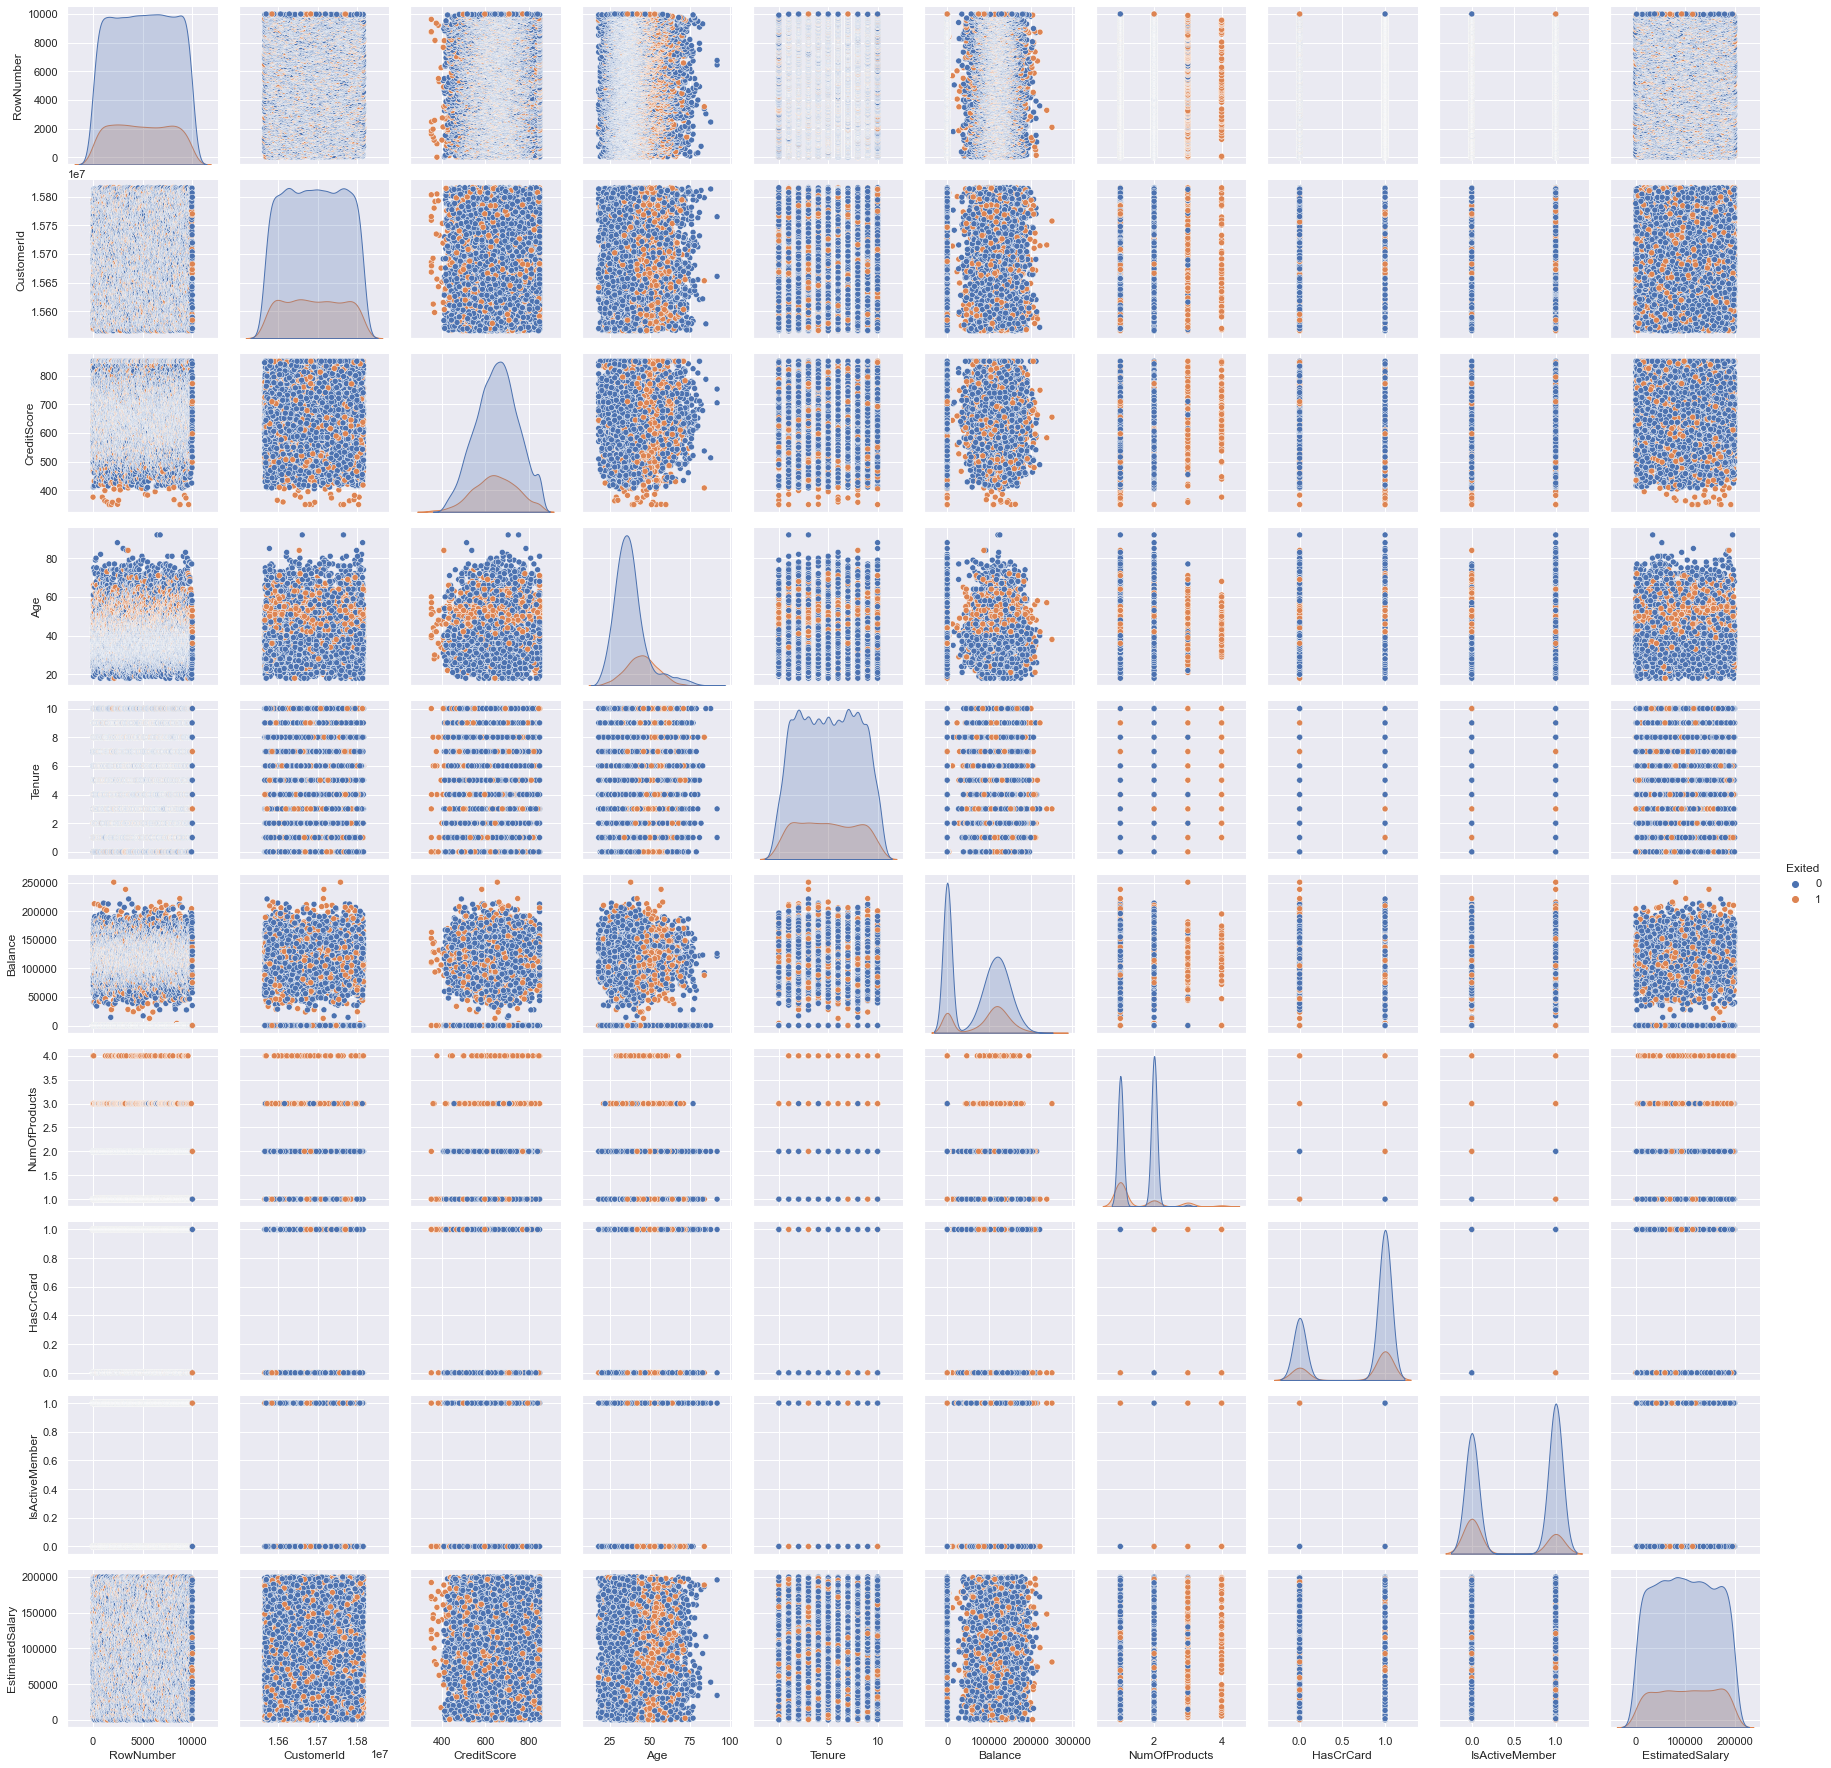

In [8]:
sns.pairplot(df, hue='Exited');

In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

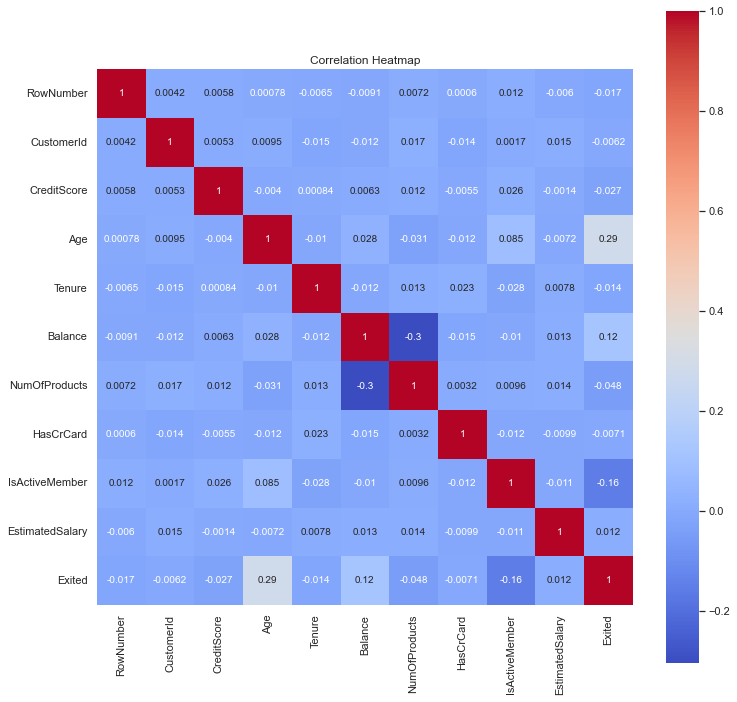

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in the variable 'df'
columns = ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure',
           'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
           'EstimatedSalary', 'Exited']

# Subset the dataset to include only the selected columns
subset_df = df[columns]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

plt.title('Correlation Heatmap')
plt.show()


In [11]:
df['Geography'].value_counts(normalize=True)*100

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

In [12]:
df.groupby('Geography')['Exited'].value_counts(normalize=True).mul(100)

Geography  Exited
France     0         83.845233
           1         16.154767
Germany    0         67.556796
           1         32.443204
Spain      0         83.326605
           1         16.673395
Name: Exited, dtype: float64

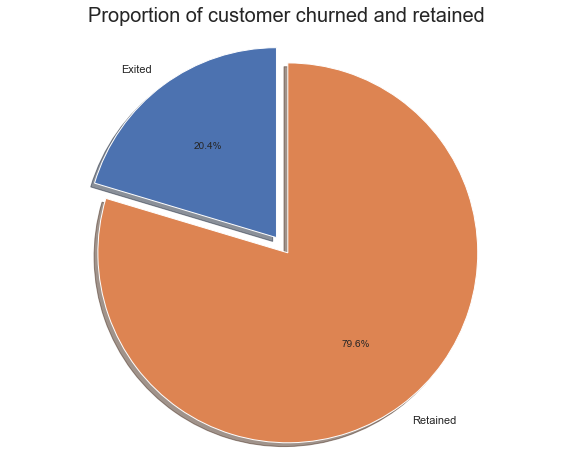

In [13]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

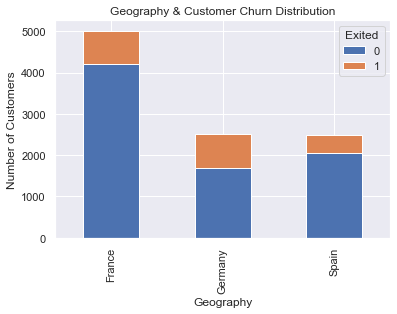

In [14]:
palette = "deep" 
sns.set_palette(palette)

pd.crosstab(df['Geography'], df['Exited']).plot(kind='bar', stacked=True)
    
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.title('Geography & Customer Churn Distribution')

plt.show()

In [15]:
df['Gender'].value_counts(normalize=True)*100

Male      54.57
Female    45.43
Name: Gender, dtype: float64

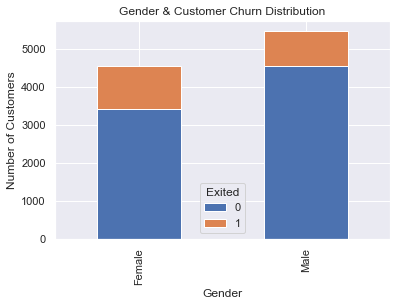

In [16]:
palette = "deep" 
sns.set_palette(palette)

pd.crosstab(df['Gender'], df['Exited']).plot(kind='bar', stacked=True)
    
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Gender & Customer Churn Distribution')

plt.show()

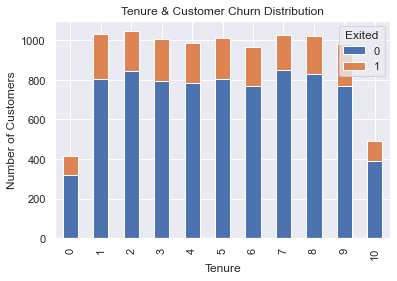

In [17]:
palette = "deep" 
sns.set_palette(palette)

pd.crosstab(df['Tenure'], df['Exited']).plot(kind='bar', stacked=True)
    
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Tenure & Customer Churn Distribution')

plt.show()

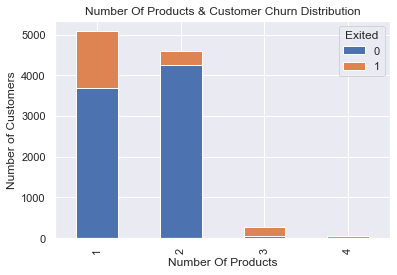

In [18]:
palette = "deep" 
sns.set_palette(palette)

pd.crosstab(df['NumOfProducts'], df['Exited']).plot(kind='bar', stacked=True)
    
plt.xlabel('Number Of Products')
plt.ylabel('Number of Customers')
plt.title('Number Of Products & Customer Churn Distribution')

plt.show()

In [19]:
print(df['NumOfProducts'].describe())
print("\n---------------------\n")
print(df['NumOfProducts'].value_counts().sort_index())
print("\n---------------------\n")
print(round(df.groupby('NumOfProducts')['Exited'].value_counts(normalize=True).mul(100),2))

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64

---------------------

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

---------------------

NumOfProducts  Exited
1              0          72.29
               1          27.71
2              0          92.42
               1           7.58
3              1          82.71
               0          17.29
4              1         100.00
Name: Exited, dtype: float64


In [20]:
#Distribution of HasCrCard
print(df['HasCrCard'].describe())
print("\n---------------------\n")
print(df['HasCrCard'].value_counts().sort_index())
print("\n---------------------\n")
print(round(df.groupby('HasCrCard')['Exited'].value_counts(normalize=True).mul(100),2))

count    10000.00000
mean         0.70550
std          0.45584
min          0.00000
25%          0.00000
50%          1.00000
75%          1.00000
max          1.00000
Name: HasCrCard, dtype: float64

---------------------

0    2945
1    7055
Name: HasCrCard, dtype: int64

---------------------

HasCrCard  Exited
0          0         79.19
           1         20.81
1          0         79.82
           1         20.18
Name: Exited, dtype: float64


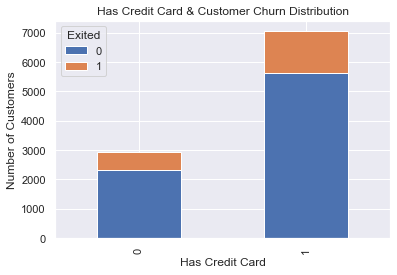

In [21]:
palette = "deep" 
sns.set_palette(palette)

pd.crosstab(df['HasCrCard'], df['Exited']).plot(kind='bar', stacked=True)
    
plt.xlabel('Has Credit Card')
plt.ylabel('Number of Customers')
plt.title('Has Credit Card & Customer Churn Distribution')

plt.show()

In [22]:
print(df['IsActiveMember'].describe())
print("\n---------------------\n")
print(df['IsActiveMember'].value_counts().sort_index())
print("\n---------------------\n")
print(round(df.groupby('IsActiveMember')['Exited'].value_counts(normalize=True).mul(100),2))

count    10000.000000
mean         0.515100
std          0.499797
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: IsActiveMember, dtype: float64

---------------------

0    4849
1    5151
Name: IsActiveMember, dtype: int64

---------------------

IsActiveMember  Exited
0               0         73.15
                1         26.85
1               0         85.73
                1         14.27
Name: Exited, dtype: float64


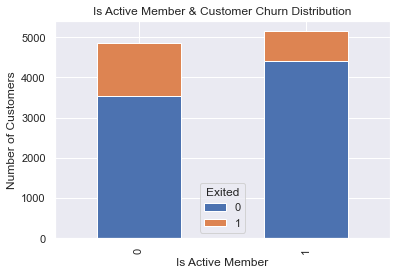

In [23]:
palette = "deep" 
sns.set_palette(palette)

pd.crosstab(df['IsActiveMember'], df['Exited']).plot(kind='bar', stacked=True)
    
plt.xlabel('Is Active Member')
plt.ylabel('Number of Customers')
plt.title('Is Active Member & Customer Churn Distribution')

plt.show()

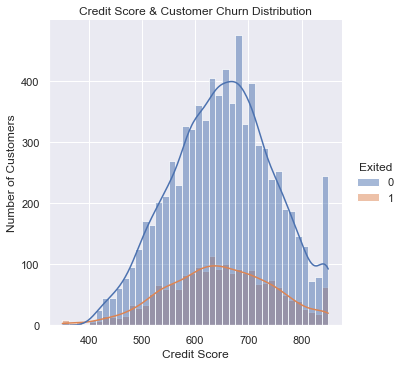

In [24]:
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=df, x='CreditScore',hue='Exited', kde=True, bins=40)
    
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers')
plt.title('Credit Score & Customer Churn Distribution')

plt.show()

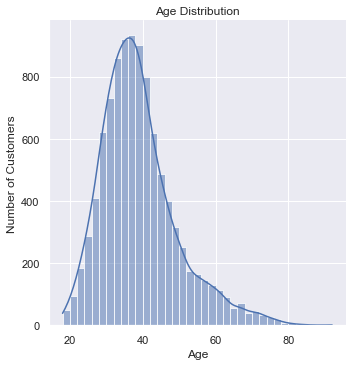

In [25]:
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=df, x='Age', kde=True, bins=37)
    
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age Distribution')

plt.show()

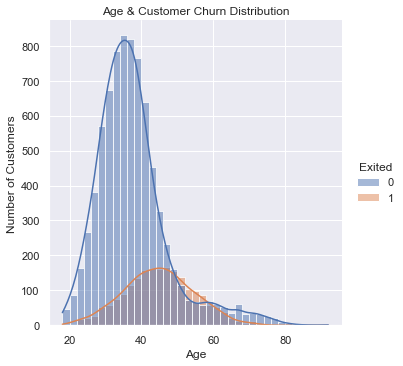

In [26]:
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=df, x='Age', hue='Exited',kde=True, bins=37)
    
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age & Customer Churn Distribution')

plt.show()

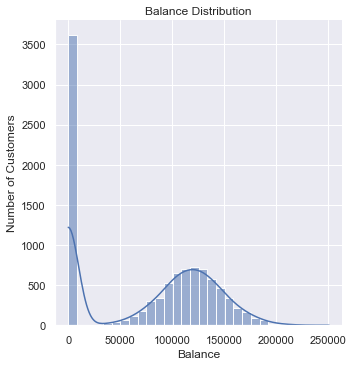

In [27]:
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=df, x='Balance', kde=True, bins=30)
    
plt.xlabel('Balance')
plt.ylabel('Number of Customers')
plt.title('Balance Distribution')

plt.show()

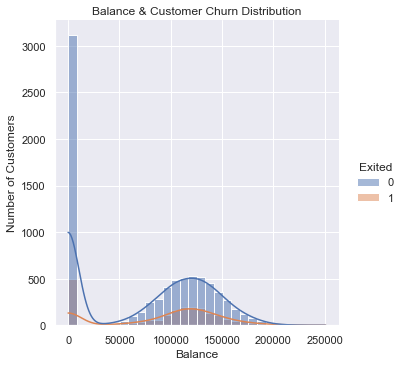

In [28]:
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=df, x='Balance', hue='Exited',kde=True, bins=30)
    
plt.xlabel('Balance')
plt.ylabel('Number of Customers')
plt.title('Balance & Customer Churn Distribution')

plt.show()

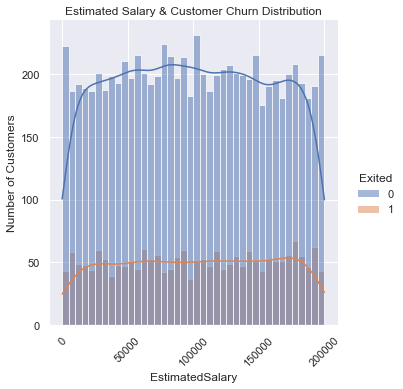

In [29]:
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=df, x='EstimatedSalary',hue='Exited', kde=True, bins=40)
    
plt.xlabel('EstimatedSalary')
plt.ylabel('Number of Customers')
plt.title('Estimated Salary & Customer Churn Distribution')
plt.xticks(rotation=45)

plt.show()

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

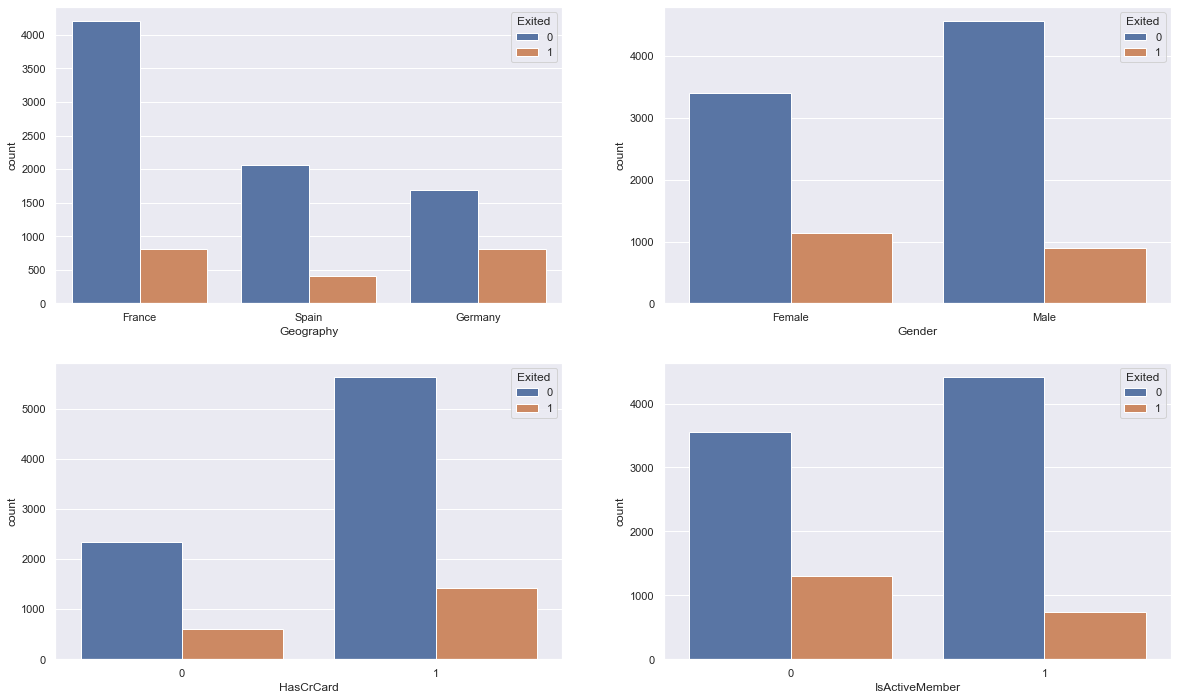

In [30]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<AxesSubplot:xlabel='Age', ylabel='Exited'>

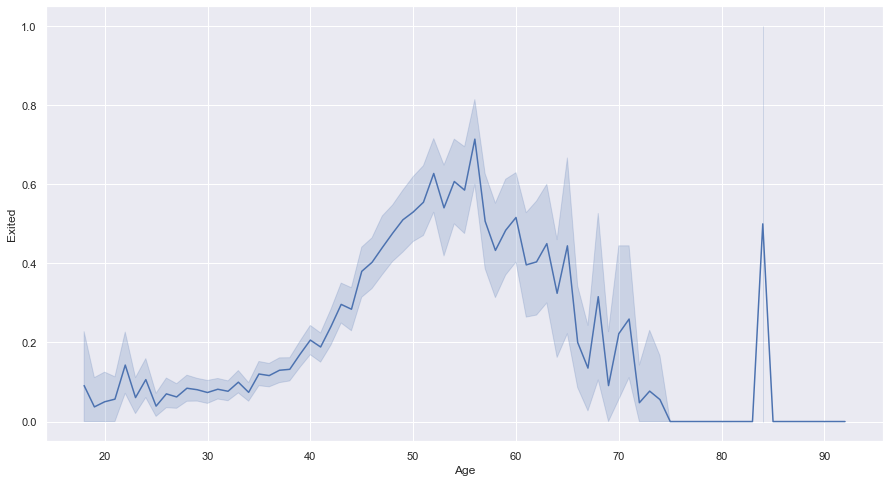

In [31]:
plt.figure(figsize = (15,8))
sns.lineplot(x = "Age", y = "Exited", data = df)

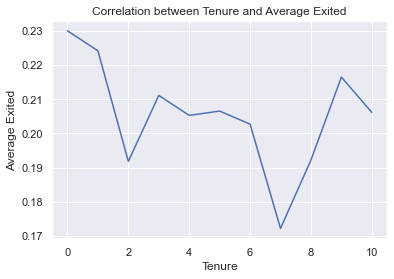

In [32]:
import matplotlib.pyplot as plt

# Calculate average likelihood of exiting for each tenure value
average_exited = df.groupby('Tenure')['Exited'].mean()

# Create a line plot
plt.plot(average_exited.index, average_exited.values)

# Set labels and title
plt.xlabel('Tenure')
plt.ylabel('Average Exited')
plt.title('Correlation between Tenure and Average Exited')

# Display the plot
plt.show()


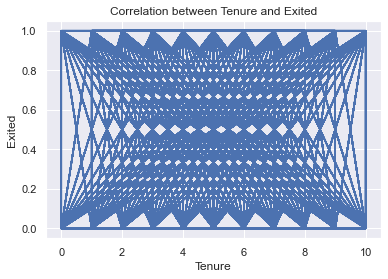

In [33]:
import matplotlib.pyplot as plt

# Get the values for tenure and exited
tenure_values = df['Tenure']
exited_values = df['Exited']

# Create a line plot
plt.plot(tenure_values, exited_values)

# Set labels and title
plt.xlabel('Tenure')
plt.ylabel('Exited')
plt.title('Correlation between Tenure and Exited')

# Display the plot
plt.show()


In [34]:
# Calculate correlation coefficients
correlations = df.corr()['Exited'].abs().sort_values(ascending=False)

# Print the correlation coefficients
print(correlations)

Exited             1.000000
Age                0.285323
IsActiveMember     0.156128
Balance            0.118533
NumOfProducts      0.047820
CreditScore        0.027094
RowNumber          0.016571
Tenure             0.014001
EstimatedSalary    0.012097
HasCrCard          0.007138
CustomerId         0.006248
Name: Exited, dtype: float64


In [35]:
import plotly.graph_objects as go

exited_0 = df[df['Exited'] == 0]['Age']
exited_1 = df[df['Exited'] == 1]['Age']

fig = go.Figure()

fig.add_trace(go.Histogram(x=exited_0, name='Exited 0', marker=dict(color='blue')))
fig.add_trace(go.Histogram(x=exited_1, name='Exited 1', marker=dict(color='red')))

fig.update_layout(
    title='Distribution of Age for Exited Categories',
    xaxis_title='Age',
    yaxis_title='Frequency',
    barmode='overlay',
    bargap=0.1,
)

fig.show()


In [36]:
import plotly.express as px

# Assuming you have a dataset with columns: 'Geography', 'Exited'
# Replace 'your_dataset.csv' with the path to your dataset

# Create the choropleth map
fig = px.choropleth(df, locations='Geography', locationmode='country names',
                    color='Exited', color_continuous_scale='YlOrRd',
                    labels={'Exited': 'Exited'}, title='Exited by Geography')

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))

fig.show()
